In [1]:
library(Seurat)
library(ggplot2)
library(RColorBrewer)
library(harmony)


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: Rcpp



In [ ]:
ggplot(egfr_cor_mapk, 
       aes(x=x,y=cor,color = cor))+
  geom_point()+scale_color_gradient2(low = 'gray10',high = 'coral3')+
  geom_text_repel(mapping = aes(label = gene),max.overlaps=50,
                  data = show_data,colour='black',
                  force_pull=0.1)+
  theme_bw()+
  theme(panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.border = element_blank(),
        axis.line.x.bottom = element_line(),
        axis.line.y.left = element_line())

In [8]:
epi = readRDS('./results//Step2_subCluster//Epithelial cells/allGenes_scaleHarmony_SCT_2022JIC_2020NC_Dataset_20230111.rds')

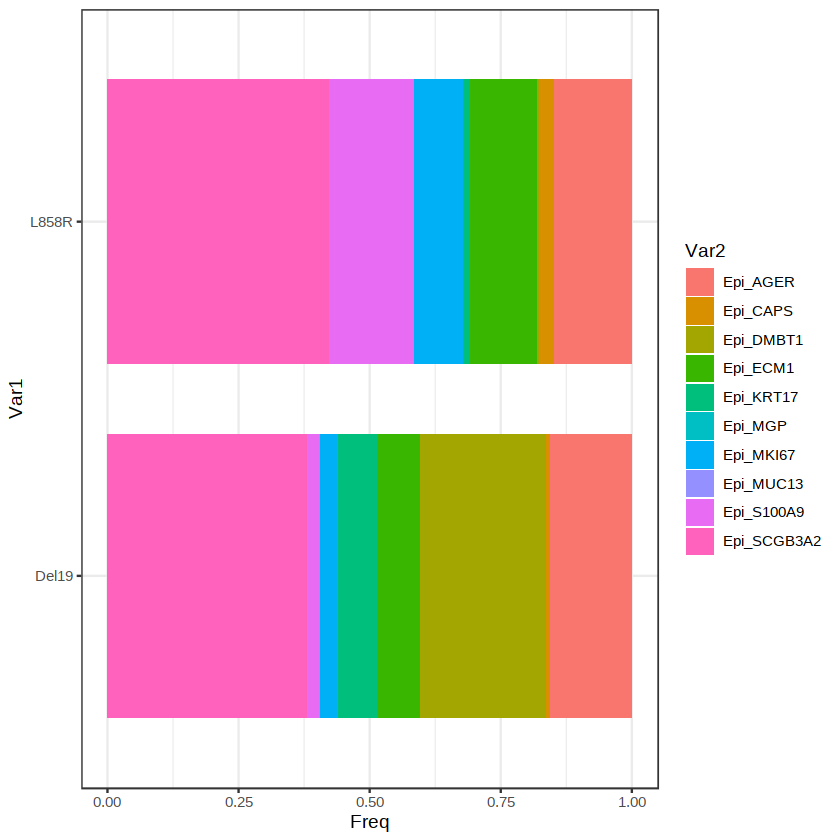

In [11]:
plot_data = as.data.frame(table(epi$mutation, epi$cluster_name))
ggplot(plot_data[which(plot_data$Var1!='WT' & plot_data$Var2!='CD8_CD4_low' & plot_data$Var2 !='NK' & plot_data$Var2 !='Prolif'),],
       aes( x = Var1,y=Freq,fill = Var2))+
       geom_bar(stat='identity',position="fill", width=0.8)+
       theme_bw()+coord_flip()

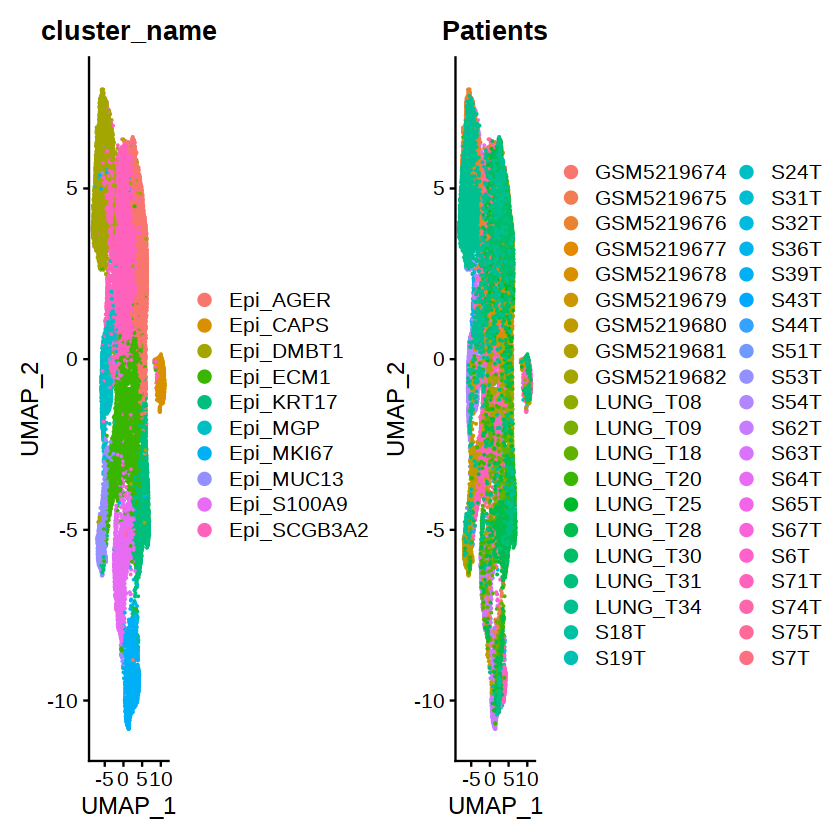

In [13]:
DimPlot(epi,group.by = c('cluster_name','Patients'))

In [21]:
score = read.csv('./results//Step4_CNV//infercnv//cnvScore_20220930.csv',row.names = 1)
score$colMeans.expr.[which(score$colMeans.expr.>0.01)] = 0.01
cell_names = colnames(epi)
cell_names = gsub('-','.',cell_names)

In [23]:
epi$cnv_score = score[cell_names,1]

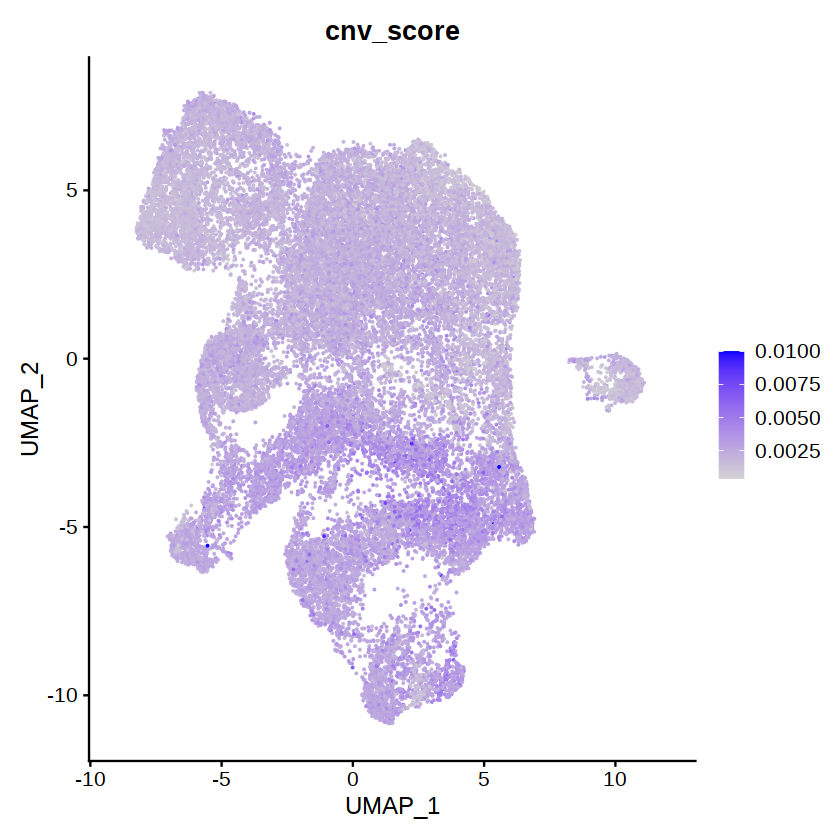

In [26]:
FeaturePlot(epi,features = 'cnv_score')